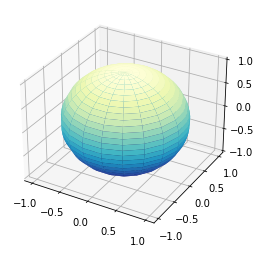

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize
import os

plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
r = 0.05
u, v = np.mgrid[0:3 * np.pi:30j, 0:np.pi:30j]
x = np.cos(u) * np.sin(v)
y = np.sin(u) * np.sin(v)
z = np.cos(v)
ax.plot_surface(x, y, z, cmap=plt.cm.YlGnBu_r)
plt.show()


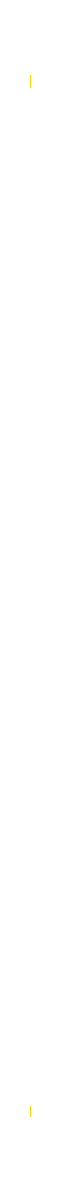

In [54]:
# only magnetar

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.animation as animation
import numpy as np
import math
import scipy.optimize
import os

circle = patches.Circle(xy = (0, 0), radius = 5, fc = 'paleturquoise')

# i = pi / 4
tmp_obs = 5 / np.sqrt(2)
observer_part1 = patches.FancyArrow(0, 0, tmp_obs, tmp_obs, width = 0.01, head_width = 0.01, linestyle = 'dashed', color = 'dimgrey')
observer_part2 = patches.FancyArrow(tmp_obs, tmp_obs, 1 / np.sqrt(2), 1 / np.sqrt(2), width = 0.01, head_width = 0.1)

spin_axis_part1 = patches.FancyArrow(0, -6, 0, 1, width = 0.01, head_width =0.01)
spin_axis_part2 = patches.FancyArrow(0, -5, 0, 10, width = 0.01, head_width = 0.01, ls='dashed', color = 'dimgrey')
spin_axis_part3 = patches.FancyArrow(0, 5, 0, 1, width = 0.01, head_width = 0.1)

# theta = pi / 3
h = 2.5
a = 2.5 * np.sqrt(3)
b = 0.5
arc_1 = patches.Arc(xy = (0, h), width = 2 * a, height = 2 * b, angle = 0, theta1 = 180, theta2 =360)
arc_2 = patches.Arc(xy = (0, h), width = 2 * a, height = 2 * b, angle = 0, theta1 = 0, theta2 = 180, ls = 'dashed')
theta_line = patches.FancyArrow(0, 0, -a, h, width = 0.01, head_width = 0.01, ls='dashed', color = 'dimgrey')

# hot spot
phi = []
x_hot_spot = []
y_hot_spot = []
c = np.sqrt(a ** 2 - b ** 2)
for i in range(0, 90):
    tmp_phi = (-1) * np.radians(i)
    phi.append(tmp_phi)
    tmp_x_hot_spot = a * np.cos(tmp_phi)
    x_hot_spot.append(tmp_x_hot_spot)
    y_hot_spot.append((-1) * b * np.sqrt(a ** 2 -  tmp_x_hot_spot ** 2) / a + h)
tmp_phi = (-1) * np.radians(90)
phi.append(tmp_phi)
tmp_x_hot_spot = a * np.cos(tmp_phi)
x_hot_spot.append(tmp_x_hot_spot)
y_hot_spot.append((-1) * b * np.sqrt(a ** 2 -  tmp_x_hot_spot ** 2) / a + h)    
for i in range(91, 180):
    tmp_phi = (-1) * np.radians(i)
    phi.append(tmp_phi)
    tmp_x_hot_spot = (-1) * x_hot_spot[179 - i]
    x_hot_spot.append(tmp_x_hot_spot)
    y_hot_spot.append(y_hot_spot[179-i])
for i in range(180, 270):
    tmp_phi = (-1) * np.radians(i)
    phi.append(tmp_phi)
    tmp_x_hot_spot = (-1) * x_hot_spot[i - 180]
    x_hot_spot.append(tmp_x_hot_spot)
    y_hot_spot.append(2 * h - y_hot_spot[i - 180])
for i in range(270, 360):
    tmp_phi = (-1) * np.radians(i)
    phi.append(tmp_phi)
    tmp_x_hot_spot = x_hot_spot[i - 270]
    x_hot_spot.append(tmp_x_hot_spot)
    y_hot_spot.append(np.tan(tmp_phi) * tmp_x_hot_spot + h)

# ax.scatter(x_hot_spot, y_hot_spot, zorder = 10, s = 10, color = 'gold')
# ax.add_patch(circle)
# ax.add_patch(observer_part1)
# ax.add_patch(observer_part2)
# ax.add_patch(spin_axis_part1)
# ax.add_patch(spin_axis_part2)
# ax.add_patch(spin_axis_part3)
# ax.add_patch(arc_1)
# ax.add_patch(arc_2)
# ax.add_patch(theta_line)

#print(phi)
#print(x_hot_spot)

fig = plt.figure(figsize=(5, 5), dpi = 300)
ax = plt.axes()

for j in range(0, 360):
    #plt.cla()
    plt.scatter(x_hot_spot[j], y_hot_spot[j], zorder = 10, s = 3, color = 'gold')
    ax.add_patch(circle)
    ax.add_patch(observer_part1)
    ax.add_patch(observer_part2)
    ax.add_patch(spin_axis_part1)
    ax.add_patch(spin_axis_part2)
    ax.add_patch(spin_axis_part3)
    ax.add_patch(arc_1)
    ax.add_patch(arc_2)
    ax.add_patch(theta_line)
    plt.axis('scaled')
    plt.axis('off')
    ax.plot()
    #plt.savefig(str(j) + '.png')

# ax.scatter(x_hot_spot[170], y_hot_spot[170], zorder = 10, s = 10, color = 'gold')
# ax.add_patch(circle)
# ax.add_patch(observer_part1)
# ax.add_patch(observer_part2)
# ax.add_patch(spin_axis_part1)
# ax.add_patch(spin_axis_part2)
# ax.add_patch(spin_axis_part3)
# ax.add_patch(arc_1)
# ax.add_patch(arc_2)
# ax.add_patch(theta_line)
# plt.axis('scaled')
# #plt.axis('off')
# ax.plot()



For pulse profile: r_g = 3, theta_1 =  1.0471975511965976 , i =  0.7853981633974483 , amp =  0.3


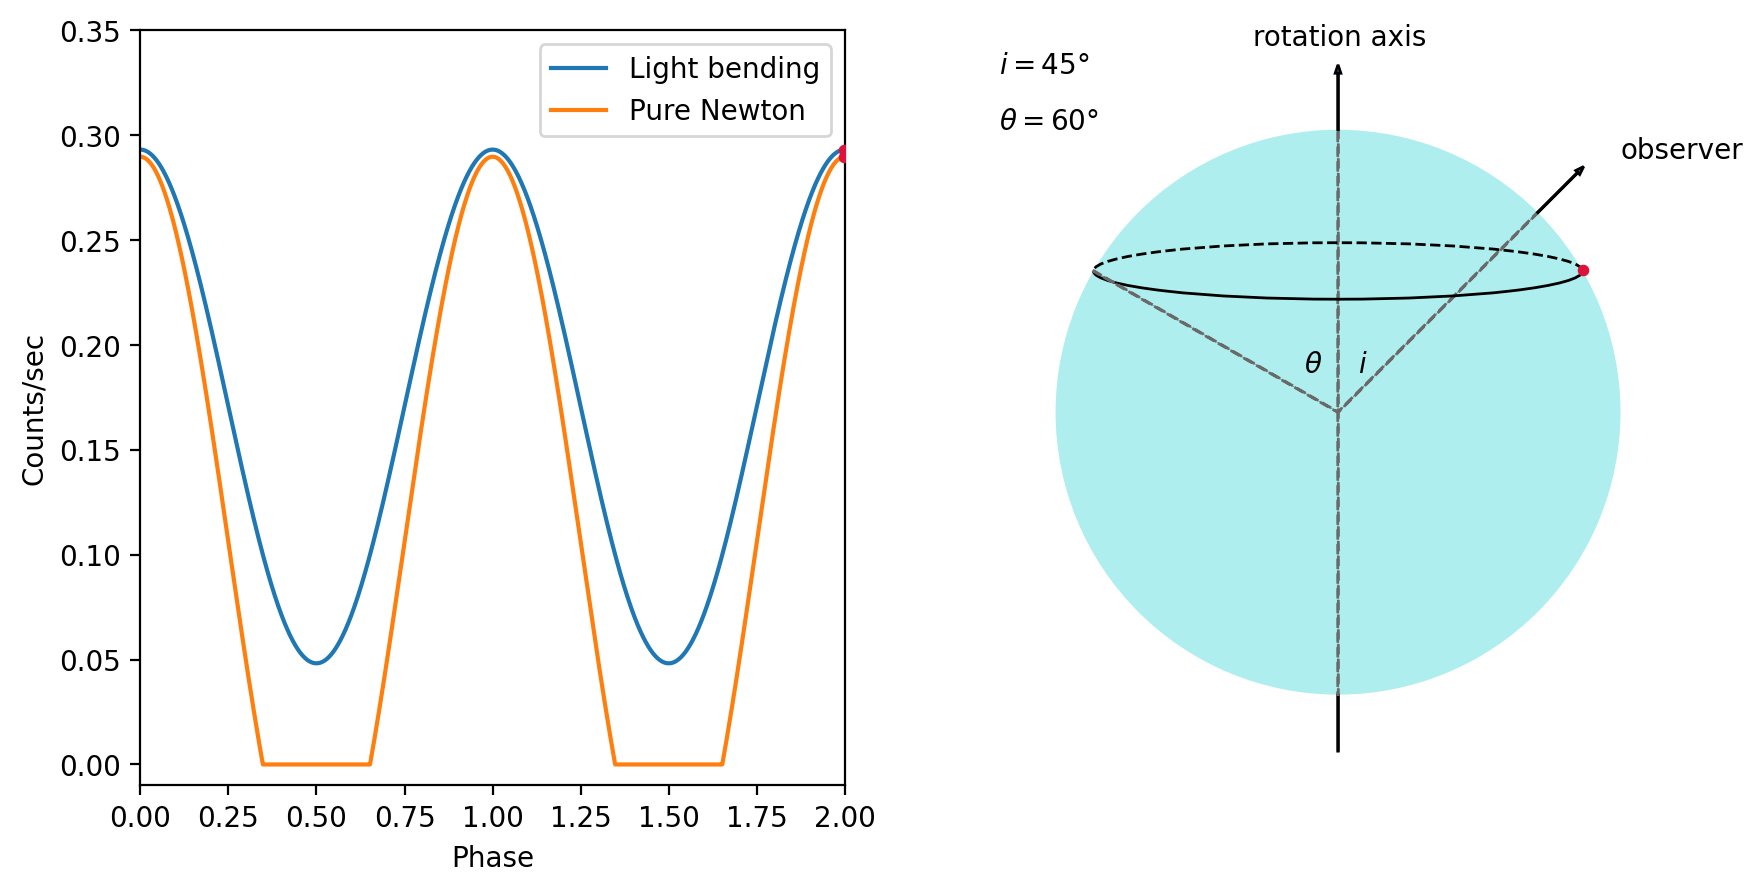

In [6]:
# magnetar with pulse profile

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.animation as animation
import numpy as np
import math
import scipy.optimize
import os

circle = patches.Circle(xy = (0, 0), radius = 5, fc = 'paleturquoise')

# i = pi / 4
tmp_obs = 5 / np.sqrt(2)
observer_part1 = patches.FancyArrow(0, 0, tmp_obs, tmp_obs, width = 0.01, head_width = 0.01, linestyle = 'dashed', color = 'dimgrey')
observer_part2 = patches.FancyArrow(tmp_obs, tmp_obs, 1 / np.sqrt(2), 1 / np.sqrt(2), width = 0.01, head_width = 0.1)

spin_axis_part1 = patches.FancyArrow(0, -6, 0, 1, width = 0.01, head_width =0.01)
spin_axis_part2 = patches.FancyArrow(0, -5, 0, 10, width = 0.01, head_width = 0.01, ls='dashed', color = 'dimgrey')
spin_axis_part3 = patches.FancyArrow(0, 5, 0, 1, width = 0.01, head_width = 0.1)

# theta = pi / 3
h = 2.5
a = 2.5 * np.sqrt(3)
b = 0.5
arc_1 = patches.Arc(xy = (0, h), width = 2 * a, height = 2 * b, angle = 0, theta1 = 180, theta2 =360)
arc_2 = patches.Arc(xy = (0, h), width = 2 * a, height = 2 * b, angle = 0, theta1 = 0, theta2 = 180, ls = 'dashed')
theta_line = patches.FancyArrow(0, 0, -a, h, width = 0.01, head_width = 0.01, ls='dashed', color = 'dimgrey')

# hot spot
phi = []
x_hot_spot = []
y_hot_spot = []
c = np.sqrt(a ** 2 - b ** 2)
for i in range(0, 90):
    tmp_phi = (-1) * np.radians(i)
    phi.append(tmp_phi)
    tmp_x_hot_spot = a * np.cos(tmp_phi)
    x_hot_spot.append(tmp_x_hot_spot)
    y_hot_spot.append((-1) * b * np.sqrt(a ** 2 -  tmp_x_hot_spot ** 2) / a + h)
tmp_phi = (-1) * np.radians(90)
phi.append(tmp_phi)
tmp_x_hot_spot = a * np.cos(tmp_phi)
x_hot_spot.append(tmp_x_hot_spot)
y_hot_spot.append((-1) * b * np.sqrt(a ** 2 -  tmp_x_hot_spot ** 2) / a + h)    
for i in range(91, 180):
    tmp_phi = (-1) * np.radians(i)
    phi.append(tmp_phi)
    tmp_x_hot_spot = (-1) * x_hot_spot[179 - i]
    x_hot_spot.append(tmp_x_hot_spot)
    y_hot_spot.append(y_hot_spot[179 - i])
for i in range(180, 270):
    tmp_phi = (-1) * np.radians(i)
    phi.append(tmp_phi)
    tmp_x_hot_spot = (-1) * x_hot_spot[i - 180]
    x_hot_spot.append(tmp_x_hot_spot)
    y_hot_spot.append(2 * h - y_hot_spot[i - 180])
for i in range(270, 360):
    tmp_phi = (-1) * np.radians(i)
    phi.append(tmp_phi)
    tmp_x_hot_spot = x_hot_spot[360 - i]
    x_hot_spot.append(tmp_x_hot_spot)
    y_hot_spot.append(2 * h - y_hot_spot[360 - i])
    
for i in range(360, 720):
    if i < 450:
        tmp_phi = (-1) * np.radians(i)
        phi.append(tmp_phi)
        tmp_x_hot_spot = a * np.cos(tmp_phi)
        x_hot_spot.append(tmp_x_hot_spot)
        y_hot_spot.append((-1) * b * np.sqrt(a ** 2 -  tmp_x_hot_spot ** 2) / a + h)
    elif i == 450:
        tmp_phi = (-1) * np.radians(90)
        phi.append(tmp_phi)
        tmp_x_hot_spot = a * np.cos(tmp_phi)
        x_hot_spot.append(tmp_x_hot_spot)
        y_hot_spot.append((-1) * b * np.sqrt(a ** 2 -  tmp_x_hot_spot ** 2) / a + h)
    elif i < 540:
        tmp_phi = (-1) * np.radians(i)
        phi.append(tmp_phi)
        tmp_x_hot_spot = (-1) * x_hot_spot[539 - i]
        x_hot_spot.append(tmp_x_hot_spot)
        y_hot_spot.append(y_hot_spot[539 - i])
    elif i < 630:
        tmp_phi = (-1) * np.radians(i)
        phi.append(tmp_phi)
        tmp_x_hot_spot = (-1) * x_hot_spot[i - 540]
        x_hot_spot.append(tmp_x_hot_spot)
        y_hot_spot.append(2 * h - y_hot_spot[i - 540])
    else:
        tmp_phi = (-1) * np.radians(i)
        phi.append(tmp_phi)
        tmp_x_hot_spot = x_hot_spot[720 - i]
        x_hot_spot.append(tmp_x_hot_spot)
        y_hot_spot.append(2 * h - y_hot_spot[720 - i])

# pulse profile
# light bending
def mu(x, theta, i, phi, m):
    y = np.sin(theta) * np.sin(i) * np.cos(2 * math.pi * x - phi) + np.cos(theta) * np.cos(i)
    F = m * (y * (1. - 1. / 3.) + 1. / 3.)
    return F
# pure Newton
def mu_n(x, theta, i, phi, m):
    y = np.sin(theta) * np.sin(i) * np.cos(2 * math.pi * x - phi) + np.cos(theta) * np.cos(i)
    F = m * (y * (1. - 0.) + 0.)
    return F

# a as theta, b as i, c as phi, d as Intensity(amplitude)
def func(x, a, b, c, d):
    return (mu(x, a, b, c, d) + abs(mu(x, a, b, c, d))) / 2
def func_n(x, a, b, c, d):
    return (mu_n(x, a, b, c, d) + abs(mu_n(x, a, b, c, d))) / 2

#parameter_initial = np.array([0.98, 0.8, 0.01, 0.32])
# d_a = 0.08726646
# a=[]
# for i in range(0, 31):
#     print(i)
#     a.append(i * d_a) 
# print(a[0])
# b = 0.524
# c = 0
# d = 0.3

a_p = math.pi / 3
b_p = math.pi / 4
c_p = 0
d_p = 0.3

x = np.linspace(-0.5, 2.5, 10000)

y_fit = func(x, a_p, b_p, c_p, d_p)
y_fit_n = func_n(x, a_p, b_p, c_p, d_p)

print("For pulse profile: r_g = 3, theta_1 = ", a_p, ", i = ", b_p, ", amp = ", d_p)

dx_p = 1 / 360
x_p = 0

# ax.scatter(x_hot_spot, y_hot_spot, zorder = 10, s = 10, color = 'gold')
# ax.add_patch(circle)
# ax.add_patch(observer_part1)
# ax.add_patch(observer_part2)
# ax.add_patch(spin_axis_part1)
# ax.add_patch(spin_axis_part2)
# ax.add_patch(spin_axis_part3)
# ax.add_patch(arc_1)
# ax.add_patch(arc_2)
# ax.add_patch(theta_line)

#print(phi)
#print(x_hot_spot)


fig = plt.figure(figsize=(10, 5), dpi = 200)
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)

for j in range(0, 720):
    # clean figure
    ax1.cla()
    ax2.cla()
    
    # magnetar
    ax2.scatter(x_hot_spot[j], y_hot_spot[j], zorder = 10, s = 10, color = "crimson")
    ax2.add_patch(circle)
    ax2.add_patch(observer_part1)
    ax2.add_patch(observer_part2)
    ax2.add_patch(spin_axis_part1)
    ax2.add_patch(spin_axis_part2)
    ax2.add_patch(spin_axis_part3)
    ax2.add_patch(arc_1)
    ax2.add_patch(arc_2)
    ax2.add_patch(theta_line)
    ax2.axis('scaled')
    ax2.axis('off')
    ax2.text(-6, 6, r"$i = 45°$")
    ax2.text(-6, 5, r"$\theta = 60°$")
    ax2.text(0.35, 0.7, r"$i$")
    ax2.text(-0.6, 0.7, r"$\theta$")
    ax2.text(5, 4.5, "observer")
    ax2.text(-1.5, 6.5, "rotation axis")
#     ax2.text(-6, -6, "light bending込み", fontname = "MS Gothic")
    ax2.plot()
    
    # pulse profile
    ax1.set_xlim(0, 2)
    ax1.set_ylim(-0.01, 0.35)
    ax1.plot(x, y_fit, label= "Light bending")
    ax1.plot(x, y_fit_n, label = "Pure Newton")
    ax1.legend()
    ax1.set_xlabel('Phase')
    ax1.set_ylabel('Counts/sec')
    ax1.scatter(x_p, func(x_p, a_p, b_p, c_p, d_p), zorder = 10, s = 10, color = "crimson")
    ax1.scatter(x_p, func_n(x_p, a_p, b_p, c_p, d_p), zorder = 10, s = 10, color = "crimson")
    x_p += dx_p
    
    plt.savefig("image1/" + str(j) + ".png")

# ax.scatter(x_hot_spot[170], y_hot_spot[170], zorder = 10, s = 10, color = 'gold')
# ax.add_patch(circle)
# ax.add_patch(observer_part1)
# ax.add_patch(observer_part2)
# ax.add_patch(spin_axis_part1)
# ax.add_patch(spin_axis_part2)
# ax.add_patch(spin_axis_part3)
# ax.add_patch(arc_1)
# ax.add_patch(arc_2)
# ax.add_patch(theta_line)
# plt.axis('scaled')
# #plt.axis('off')
# ax.plot()



In [18]:
# failed code

import sys
import cv2

fourcc = cv2.VideoWriter_fourcc('m', 'p', '4', 'v')
# output file name, encoder, fps, size(fit to image size)
video = cv2.VideoWriter('video.mp4', fourcc, 60.0, (10, 5))

if not video.isOpened():
    print("can't be opened")
    sys.exit()

for i in range(0, 360):
    # hoge0000.png, hoge0001.png,..., hoge0090.png
    file_read = './' + str(i) + '.png'
    print(file_read)
    img = cv2.imread(file_read)

    # can't read image, escape
    if img is None:
        print("can't read")
        break

    # add
    video.write(img)
    print(i)

video.release()
print('written')

./0.png
0
./1.png
1
./2.png
2
./3.png
3
./4.png
4
./5.png
5
./6.png
6
./7.png
7
./8.png
8
./9.png
9
./10.png
10
./11.png
11
./12.png
12
./13.png
13
./14.png
14
./15.png
15
./16.png
16
./17.png
17
./18.png
18
./19.png
19
./20.png
20
./21.png
21
./22.png
22
./23.png
23
./24.png
24
./25.png
25
./26.png
26
./27.png
27
./28.png
28
./29.png
29
./30.png
30
./31.png
31
./32.png
32
./33.png
33
./34.png
34
./35.png
35
./36.png
36
./37.png
37
./38.png
38
./39.png
39
./40.png
40
./41.png
41
./42.png
42
./43.png
43
./44.png
44
./45.png
45
./46.png
46
./47.png
47
./48.png
48
./49.png
49
./50.png
50
./51.png
51
./52.png
52
./53.png
53
./54.png
54
./55.png
55
./56.png
56
./57.png
57
./58.png
58
./59.png
59
./60.png
60
./61.png
61
./62.png
62
./63.png
63
./64.png
64
./65.png
65
./66.png
66
./67.png
67
./68.png
68
./69.png
69
./70.png
70
./71.png
71
./72.png
72
./73.png
73
./74.png
74
./75.png
75
./76.png
76
./77.png
77
./78.png
78
./79.png
79
./80.png
80
./81.png
81
./82.png
82
./83.png
83
./84.png
84


In [20]:
import os
import glob
import cv2

path1 = os.path.dirname(__file__) + "\\image1\\"

a1 = glob.glob( path1 + "*.png" )
#print(a1)

img1 = cv2.imread(a1[0])
Y1, X1, channels1 = img1.shape[:3]
frame_rate1 = 60

file1 = path1 + 'video1.mp4'
fourcc = cv2.VideoWriter_fourcc('m', 'p', '4', 'v') 
video1 = cv2.VideoWriter(file1, fourcc, frame_rate1, (X1, Y1))

for file0 in a1:
    img1 = cv2.imread(file0)
    if img1 is None:
        print("error!")
    else: 
        img1 = cv2.resize(img1, (X1, Y1))
        video1.write(img1)

video1.release()

NameError: name '__file__' is not defined

In [ ]:
# upgrade version

import os
import glob
import cv2

path1 = os.path.dirname(__file__) + "\\image1\\"

a1 = []
for i  in range(0, 360):
    a = glob.glob(path1 + "%d.png" %i)
    a1.append(str(a))

img1 = cv2.imread(a1[0])
Y1, X1, channels1 = img1.shape[:3]
frame_rate1 = 60

file1 = path1 + 'video1.mp4'
fourcc = cv2.VideoWriter_fourcc('m', 'p', '4', 'v') 
video1 = cv2.VideoWriter(file1, fourcc, frame_rate1, (X1, Y1))

for file0 in a1:
    img1 = cv2.imread(file0)
    if img1 is None:
        print("error!")
    else: 
        img1 = cv2.resize(img1, (X1, Y1))
        video1.write(img1)

video1.release()

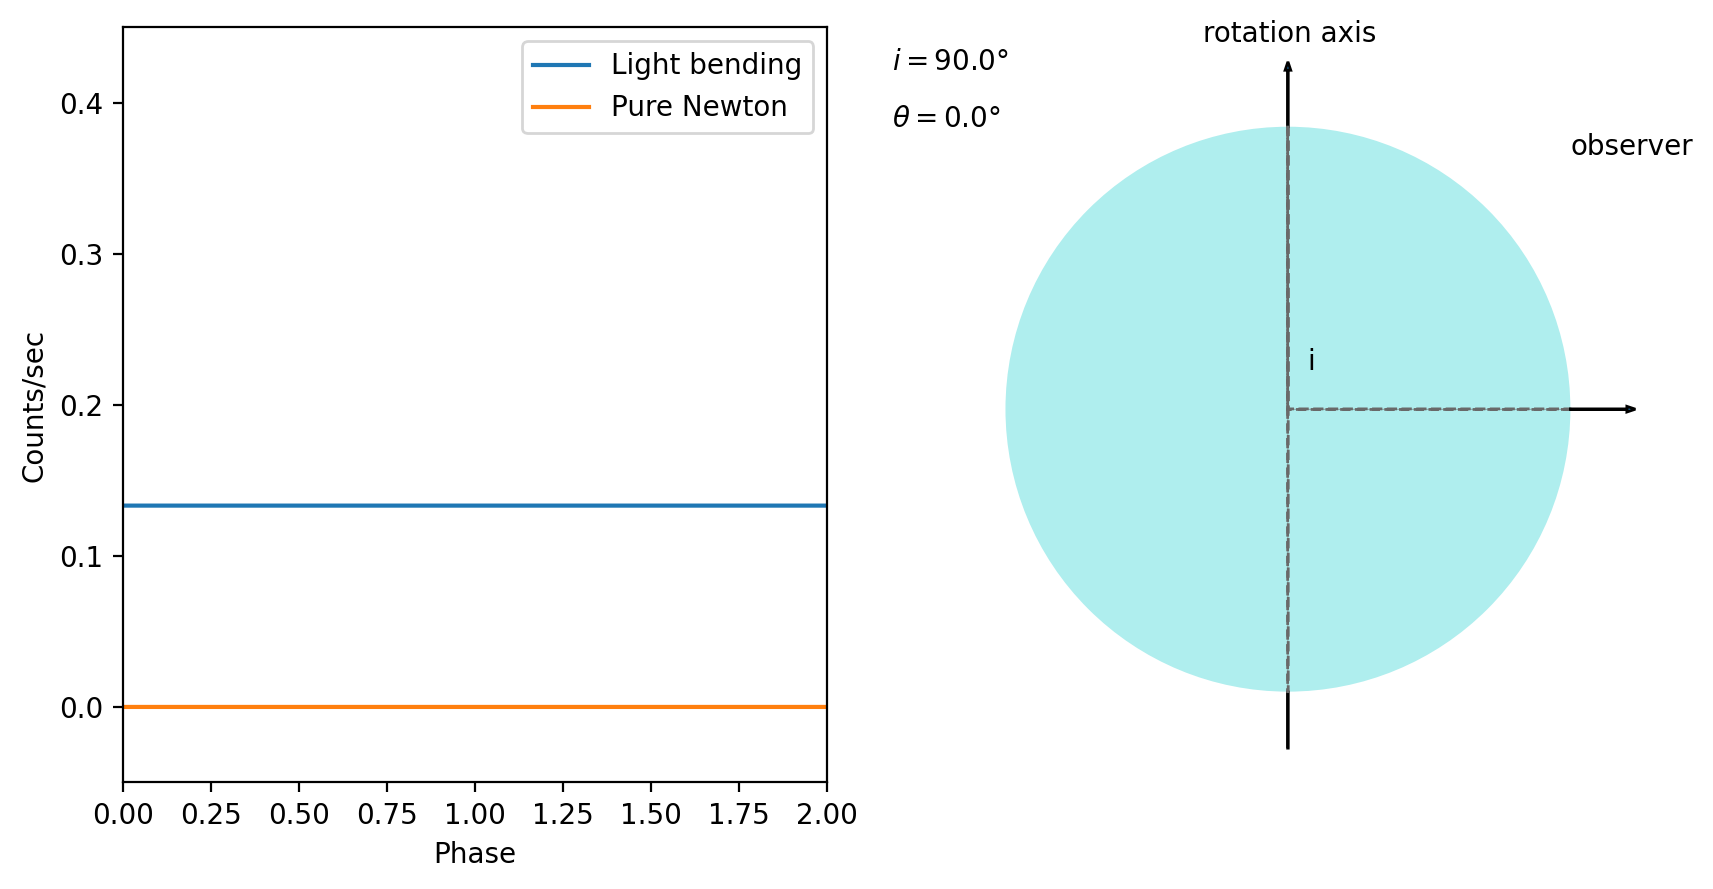

In [23]:
# magnetar with pulse profile
# theta main

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.animation as animation
import numpy as np
import math
import scipy.optimize
import os

# ellipse e = 2√6 / 5
b_over_a = 1 / 5
h = []
a = []
b = []
arc_front = []
arc_back = []
theta_line = []
theta = []
# vital parameter!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!11
inclination = np.radians(90)
phi = 0
amp = 0.4

# theta list
theta_ini = 0
theta.append(theta_ini)
# Number of equal part
N_eq_part = 360
for j in range(0, N_eq_part):
    theta.append(np.radians(j / 2))
    
# size of circle'
r_circle = 5
circle = patches.Circle(xy = (0, 0), radius = r_circle, fc = 'paleturquoise')

# magnetar part
tmp_obs_x = r_circle * np.sin(inclination)
tmp_obs_y = r_circle * np.cos(inclination)
observer_part1 = patches.FancyArrow(0, 0, tmp_obs_x, tmp_obs_y, width = 0.01, head_width = 0.01, linestyle = 'dashed', color = 'dimgrey')
observer_part2 = patches.FancyArrow(tmp_obs_x, tmp_obs_y, np.sin(inclination), np.cos(inclination), width = 0.01, head_width = 0.1)

spin_axis_part1 = patches.FancyArrow(0, -6, 0, 1, width = 0.01, head_width =0.01)
spin_axis_part2 = patches.FancyArrow(0, -5, 0, 10, width = 0.01, head_width = 0.01, ls='dashed', color = 'dimgrey')
spin_axis_part3 = patches.FancyArrow(0, 5, 0, 1, width = 0.01, head_width = 0.1)

# pulse profile
# light bending
def mu(x, theta, i, phi, m):
    y = np.sin(theta) * np.sin(i) * np.cos(2 * math.pi * x - phi) + np.cos(theta) * np.cos(i)
    F = m * (y * (1. - 1. / 3.) + 1. / 3.)
    return F
# pure Newton
def mu_n(x, theta, i, phi, m):
    y = np.sin(theta) * np.sin(i) * np.cos(2 * math.pi * x - phi) + np.cos(theta) * np.cos(i)
    F = m * (y * (1. - 0.) + 0.)
    return F

# a as theta, b as i, c as phi, d as Intensity(amplitude)
def func(x, a, b, c, d):
    return (mu(x, a, b, c, d) + abs(mu(x, a, b, c, d))) / 2
def func_n(x, a, b, c, d):
    return (mu_n(x, a, b, c, d) + abs(mu_n(x, a, b, c, d))) / 2

x = np.linspace(-0.5, 2.5, 10000)

# figure setting
fig = plt.figure(figsize=(10, 5), dpi = 200)
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)

# plot
for j in range(0, 2 * N_eq_part):
    # clean figure
    ax1.cla()
    ax2.cla()

    if j < 360:      
        # magnetar illustration
        h = np.cos(theta[j]) * r_circle
        a = r_circle * np.sin(theta[j])
        b = b_over_a * a
        arc_front.append(patches.Arc(xy = (0, h), width = 2 * a, height = 2 * b, angle = 0, theta1 = 180, theta2 = 360))
        arc_back.append(patches.Arc(xy = (0, h), width = 2 * a, height = 2 * b, angle = 0, theta1 = 0, theta2 = 180, ls = 'dashed'))
        theta_line.append(patches.FancyArrow(0, 0, -a, h, width = 0.01, head_width = 0.01, ls='dashed', color = 'dimgrey'))

        ax2.add_patch(circle)
        ax2.add_patch(observer_part1)
        ax2.add_patch(observer_part2)
        ax2.add_patch(spin_axis_part1)
        ax2.add_patch(spin_axis_part2)
        ax2.add_patch(spin_axis_part3)
        ax2.add_patch(arc_front[j])
        ax2.add_patch(arc_back[j])
        ax2.add_patch(theta_line[j])
        ax2.axis('scaled')
        ax2.axis('off')
        ax2.text(-7, 5, r"$\theta = $" + str(np.degrees(theta[j])) + "°")
        ax2.text(-7, 6, r"$i = $" + str(np.degrees(inclination)) + "°")
        ax2.text(0.35, 0.7, r"$i$")
        ax2.text(5, 4.5, "observer")
        ax2.text(-1.5, 6.5, "rotation axis")
#         ax2.text(-6, -6, "light bending込み", fontname = "MS Gothic")
        ax2.plot()

        # pulse profile
        y_fit = func(x, theta[j], inclination, phi, amp)
        y_fit_n = func_n(x, theta[j], inclination, phi, amp)
        ax1.set_ylim(-0.05, 0.45)
        ax1.set_xlim(0, 2)
        ax1.plot(x, y_fit, label = "Light bending")
        ax1.plot(x, y_fit_n, label = "Pure Newton")
        ax1.legend()
        ax1.set_xlabel('Phase')
        ax1.set_ylabel('Counts/sec')

        plt.savefig("image1/" + str(j) + ".png")
    elif j >= 360:
        h = np.cos(theta[720 - j]) * r_circle
        a = r_circle * np.sin(theta[720 - j])
        b = b_over_a * a
        arc_front.append(patches.Arc(xy = (0, h), width = 2 * a, height = 2 * b, angle = 0, theta1 = 180, theta2 = 360))
        arc_back.append(patches.Arc(xy = (0, h), width = 2 * a, height = 2 * b, angle = 0, theta1 = 0, theta2 = 180, ls = 'dashed'))
        theta_line.append(patches.FancyArrow(0, 0, -a, h, width = 0.01, head_width = 0.01, ls='dashed', color = 'dimgrey'))

        ax2.add_patch(circle)
        ax2.add_patch(observer_part1)
        ax2.add_patch(observer_part2)
        ax2.add_patch(spin_axis_part1)
        ax2.add_patch(spin_axis_part2)
        ax2.add_patch(spin_axis_part3)
        ax2.add_patch(arc_front[720 - j])
        ax2.add_patch(arc_back[720 - j])
        ax2.add_patch(theta_line[720 - j])
        ax2.axis('scaled')
        ax2.axis('off')
        ax2.text(-7, 5, r"$\theta = $" + str(np.degrees(theta[720 - j])) + "°")
        ax2.text(-7, 6, r"$i = $" + str(np.degrees(inclination)) + "°")
        ax2.text(0.35, 0.7, "i")
        ax2.text(5, 4.5, "observer")
        ax2.text(-1.5, 6.5, "rotation axis")
#         ax2.text(-6, -6, "light bending込み", fontname = "MS Gothic")
        ax2.plot()

        # pulse profile
        # light bending
        y_fit = func(x, theta[720 - j], inclination, phi, amp)
        y_fit_n = func_n(x, theta[720 - j], inclination, phi, amp)
        ax1.set_ylim(-0.05, 0.45)
        ax1.set_xlim(0, 2)
        ax1.plot(x, y_fit, label = "Light bending")
        ax1.plot(x, y_fit_n, label = "Pure Newton")
        ax1.legend()
        ax1.set_xlabel('Phase')
        ax1.set_ylabel('Counts/sec')
        # pure newton

        plt.savefig("image1/" + str(j) + ".png")

In [ ]:
# 未完成 未完成 未完成 未完成 未完成 未完成
# magnetar with pulse profile
# light-bending factor

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.animation as animation
import numpy as np
import math
import scipy.optimize
import os

# ellipse e = 2√6 / 5
b_over_a = 1 / 5
h = []
a = []
b = []
arc_front = []
arc_back = []
theta_line = []
theta = []
# vital parameter!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!11
inclination = np.radians(45)
phi = 0
amp = 0.4

# theta list
theta_ini = 0
theta.append(theta_ini)
# Number of equal part
N_eq_part = 360
for j in range(0, N_eq_part):
    theta.append(np.radians(j / 2))
    
# size of circle'
r_circle = 5
circle = patches.Circle(xy = (0, 0), radius = r_circle, fc = 'paleturquoise')

# magnetar part
tmp_obs_x = r_circle * np.sin(inclination)
tmp_obs_y = r_circle * np.cos(inclination)
observer_part1 = patches.FancyArrow(0, 0, tmp_obs_x, tmp_obs_y, width = 0.01, head_width = 0.01, linestyle = 'dashed', color = 'dimgrey')
observer_part2 = patches.FancyArrow(tmp_obs_x, tmp_obs_y, np.sin(inclination), np.cos(inclination), width = 0.01, head_width = 0.1)

spin_axis_part1 = patches.FancyArrow(0, -6, 0, 1, width = 0.01, head_width =0.01)
spin_axis_part2 = patches.FancyArrow(0, -5, 0, 10, width = 0.01, head_width = 0.01, ls='dashed', color = 'dimgrey')
spin_axis_part3 = patches.FancyArrow(0, 5, 0, 1, width = 0.01, head_width = 0.1)

# pulse profile
# light bending
def mu(x, theta, i, phi, m):
    y = np.sin(theta) * np.sin(i) * np.cos(2 * math.pi * x - phi) + np.cos(theta) * np.cos(i)
    F = m * (y * (1. - 1. / 3.) + 1. / 3.)
    return F
# pure Newton
def mu_n(x, theta, i, phi, m):
    y = np.sin(theta) * np.sin(i) * np.cos(2 * math.pi * x - phi) + np.cos(theta) * np.cos(i)
    F = m * (y * (1. - 0.) + 0.)
    return F

# a as theta, b as i, c as phi, d as Intensity(amplitude)
def func(x, a, b, c, d):
    return (mu(x, a, b, c, d) + abs(mu(x, a, b, c, d))) / 2
def func_n(x, a, b, c, d):
    return (mu_n(x, a, b, c, d) + abs(mu_n(x, a, b, c, d))) / 2

x = np.linspace(-0.5, 2.5, 10000)

# figure setting
fig = plt.figure(figsize=(10, 5), dpi = 200)
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)

# plot
for j in range(0, 2 * N_eq_part):
    # clean figure
    ax1.cla()
    ax2.cla()

    if j < 360:      
        # magnetar illustration
        h = np.cos(theta[j]) * r_circle
        a = r_circle * np.sin(theta[j])
        b = b_over_a * a
        arc_front.append(patches.Arc(xy = (0, h), width = 2 * a, height = 2 * b, angle = 0, theta1 = 180, theta2 = 360))
        arc_back.append(patches.Arc(xy = (0, h), width = 2 * a, height = 2 * b, angle = 0, theta1 = 0, theta2 = 180, ls = 'dashed'))
        theta_line.append(patches.FancyArrow(0, 0, -a, h, width = 0.01, head_width = 0.01, ls='dashed', color = 'dimgrey'))

        ax2.add_patch(circle)
        ax2.add_patch(observer_part1)
        ax2.add_patch(observer_part2)
        ax2.add_patch(spin_axis_part1)
        ax2.add_patch(spin_axis_part2)
        ax2.add_patch(spin_axis_part3)
        ax2.add_patch(arc_front[j])
        ax2.add_patch(arc_back[j])
        ax2.add_patch(theta_line[j])
        ax2.axis('scaled')
        ax2.axis('off')
        ax2.text(-7, 5, r"$\theta = $" + str(np.degrees(theta[j])) + "°")
        ax2.text(-7, 6, r"$i = $" + str(np.degrees(inclination)) + "°")
        ax2.text(0.35, 0.7, r"$i$")
        ax2.text(5, 4.5, "observer")
        ax2.text(-1.5, 6.5, "rotation axis")
#         ax2.text(-6, -6, "light bending込み", fontname = "MS Gothic")
        ax2.plot()

        # pulse profile
        y_fit = func(x, theta[j], inclination, phi, amp)
        y_fit_n = func_n(x, theta[j], inclination, phi, amp)
        ax1.set_ylim(-0.05, 0.45)
        ax1.set_xlim(0, 2)
        ax1.plot(x, y_fit, label = "Light bending")
        ax1.plot(x, y_fit_n, label = "Pure Newton")
        ax1.legend()
        ax1.set_xlabel('Phase')
        ax1.set_ylabel('Counts/sec')

        plt.savefig("image1/" + str(j) + ".png")
    elif j >= 360:
        h = np.cos(theta[720 - j]) * r_circle
        a = r_circle * np.sin(theta[720 - j])
        b = b_over_a * a
        arc_front.append(patches.Arc(xy = (0, h), width = 2 * a, height = 2 * b, angle = 0, theta1 = 180, theta2 = 360))
        arc_back.append(patches.Arc(xy = (0, h), width = 2 * a, height = 2 * b, angle = 0, theta1 = 0, theta2 = 180, ls = 'dashed'))
        theta_line.append(patches.FancyArrow(0, 0, -a, h, width = 0.01, head_width = 0.01, ls='dashed', color = 'dimgrey'))

        ax2.add_patch(circle)
        ax2.add_patch(observer_part1)
        ax2.add_patch(observer_part2)
        ax2.add_patch(spin_axis_part1)
        ax2.add_patch(spin_axis_part2)
        ax2.add_patch(spin_axis_part3)
        ax2.add_patch(arc_front[720 - j])
        ax2.add_patch(arc_back[720 - j])
        ax2.add_patch(theta_line[720 - j])
        ax2.axis('scaled')
        ax2.axis('off')
        ax2.text(-7, 5, r"$\theta = $" + str(np.degrees(theta[720 - j])) + "°")
        ax2.text(-7, 6, r"$i = $" + str(np.degrees(inclination)) + "°")
        ax2.text(0.35, 0.7, "i")
        ax2.text(5, 4.5, "observer")
        ax2.text(-1.5, 6.5, "rotation axis")
#         ax2.text(-6, -6, "light bending込み", fontname = "MS Gothic")
        ax2.plot()

        # pulse profile
        # light bending
        y_fit = func(x, theta[720 - j], inclination, phi, amp)
        y_fit_n = func_n(x, theta[720 - j], inclination, phi, amp)
        ax1.set_ylim(-0.05, 0.45)
        ax1.set_xlim(0, 2)
        ax1.plot(x, y_fit, label = "Light bending")
        ax1.plot(x, y_fit_n, label = "Pure Newton")
        ax1.legend()
        ax1.set_xlabel('Phase')
        ax1.set_ylabel('Counts/sec')
        # pure newton

        plt.savefig("image1/" + str(j) + ".png")

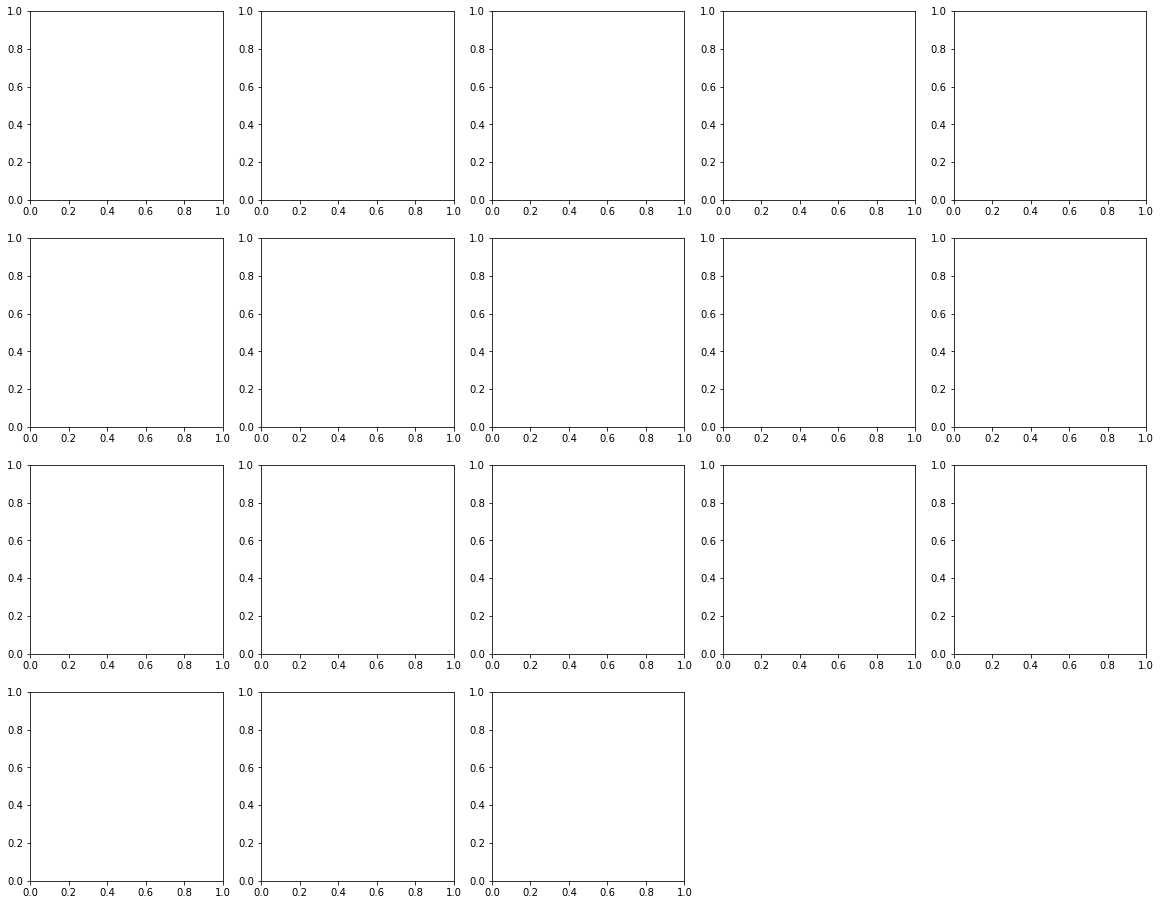

In [29]:
# magnetar with pulse profile
# inclination angle main

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.animation as animation
import numpy as np
import math
import scipy.optimize
import os

# ellipse e = 2√6 / 5
b_over_a = 1 / 5
h = []
a = []
b = []
arc_front = []
arc_back = []
theta_line = []
theta = []
# vital parameter!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!11
#inclination = np.radians(45)
inclination = []
for i in range(0, 90, 5):
    inclination.append(np.radians(i))
phi = 0
amp = 0.4

# theta list
theta_ini = 0
theta.append(theta_ini)
# Number of equal part
N_eq_part = 360
for j in range(0, N_eq_part):
    theta.append(np.radians(j / 2))
    
# # size of circle'
# r_circle = 5
# circle = patches.Circle(xy = (0, 0), radius = r_circle, fc = 'paleturquoise')

# # magnetar part
# tmp_obs_x = r_circle * np.sin(inclination)
# tmp_obs_y = r_circle * np.cos(inclination)
# observer_part1 = patches.FancyArrow(0, 0, tmp_obs_x, tmp_obs_y, width = 0.01, head_width = 0.01, linestyle = 'dashed', color = 'dimgrey')
# observer_part2 = patches.FancyArrow(tmp_obs_x, tmp_obs_y, np.sin(inclination), np.cos(inclination), width = 0.01, head_width = 0.1)

# spin_axis_part1 = patches.FancyArrow(0, -6, 0, 1, width = 0.01, head_width =0.01)
# spin_axis_part2 = patches.FancyArrow(0, -5, 0, 10, width = 0.01, head_width = 0.01, ls='dashed', color = 'dimgrey')
# spin_axis_part3 = patches.FancyArrow(0, 5, 0, 1, width = 0.01, head_width = 0.1)

# pulse profile
# light bending
def mu(x, theta, i, phi, m):
    y = np.sin(theta) * np.sin(i) * np.cos(2 * math.pi * x - phi) + np.cos(theta) * np.cos(i)
    F = m * (y * (1. - 1. / 3.) + 1. / 3.)
    return F
# pure Newton
def mu_n(x, theta, i, phi, m):
    y = np.sin(theta) * np.sin(i) * np.cos(2 * math.pi * x - phi) + np.cos(theta) * np.cos(i)
    F = m * (y * (1. - 0.) + 0.)
    return F

# a as theta, b as i, c as phi, d as Intensity(amplitude)
def func(x, a, b, c, d):
    return (mu(x, a, b, c, d) + abs(mu(x, a, b, c, d))) / 2
def func_n(x, a, b, c, d):
    return (mu_n(x, a, b, c, d) + abs(mu_n(x, a, b, c, d))) / 2

x = np.linspace(-0.5, 2.5, 10000)

# figure setting
fig = plt.figure(figsize = (20,16))
ax1 = plt.subplot(4, 5, 1)
ax2 = plt.subplot(4, 5, 2)
ax3 = plt.subplot(4, 5, 3)
ax4 = plt.subplot(4, 5, 4)
ax5 = plt.subplot(4, 5, 5)
ax6 = plt.subplot(4, 5, 6)
ax7 = plt.subplot(4, 5, 7)
ax8 = plt.subplot(4, 5, 8)
ax9 = plt.subplot(4, 5, 9)
ax10 = plt.subplot(4, 5, 10)
ax11 = plt.subplot(4, 5, 11)
ax12 = plt.subplot(4, 5, 12)
ax13 = plt.subplot(4, 5, 13)
ax14 = plt.subplot(4, 5, 14)
ax15 = plt.subplot(4, 5, 15)
ax16 = plt.subplot(4, 5, 16)
ax17 = plt.subplot(4, 5, 17)
ax18 = plt.subplot(4, 5, 18)

# plot
for j in range(0, 2 * N_eq_part, 5):
    # clean figure
    ax1.cla()
    ax2.cla()
    ax3.cla()
    ax4.cla()
    ax5.cla()
    ax6.cla()
    ax7.cla()
    ax8.cla()
    ax9.cla()
    ax10.cla()
    ax11.cla()
    ax12.cla()
    ax13.cla()
    ax14.cla()
    ax15.cla()
    ax16.cla()
    ax17.cla()
    ax18.cla()
    
    if j < 360:      
#         # magnetar illustration
#         h = np.cos(theta[j]) * r_circle
#         a = r_circle * np.sin(theta[j])
#         b = b_over_a * a
#         arc_front.append(patches.Arc(xy = (0, h), width = 2 * a, height = 2 * b, angle = 0, theta1 = 180, theta2 = 360))
#         arc_back.append(patches.Arc(xy = (0, h), width = 2 * a, height = 2 * b, angle = 0, theta1 = 0, theta2 = 180, ls = 'dashed'))
#         theta_line.append(patches.FancyArrow(0, 0, -a, h, width = 0.01, head_width = 0.01, ls='dashed', color = 'dimgrey'))

#         ax2.add_patch(circle)
#         ax2.add_patch(observer_part1)
#         ax2.add_patch(observer_part2)
#         ax2.add_patch(spin_axis_part1)
#         ax2.add_patch(spin_axis_part2)
#         ax2.add_patch(spin_axis_part3)
#         ax2.add_patch(arc_front[j])
#         ax2.add_patch(arc_back[j])
#         ax2.add_patch(theta_line[j])
#         ax2.axis('scaled')
#         ax2.axis('off')
#         ax2.text(-7, 5, r"$\theta = $" + str(np.degrees(theta[j])) + "°")
#         ax2.text(-7, 6, r"$i = $" + str(np.degrees(inclination)) + "°")
#         ax2.text(0.35, 0.7, r"$i$")
#         ax2.text(5, 4.5, "observer")
#         ax2.text(-1.5, 6.5, "rotation axis")
# #         ax2.text(-6, -6, "light bending込み", fontname = "MS Gothic")
#         ax2.plot()

        # pulse profile
        y_fit = func(x, theta[j], inclination[0], phi, amp)
        y_fit_n = func_n(x, theta[j], inclination[0], phi, amp)
        ax1.set_ylim(-0.05, 0.45)
        ax1.set_xlim(0, 2)
        ax1.plot(x, y_fit, label = "Light bending")
        ax1.plot(x, y_fit_n, label = "Pure Newton")
        ax1.legend()
        ax1.set_xlabel('Phase')
        ax1.set_ylabel('Counts/sec')

        y_fit = func(x, theta[j], inclination[1], phi, amp)
        y_fit_n = func_n(x, theta[j], inclination[1], phi, amp)
        ax2.set_ylim(-0.05, 0.45)
        ax2.set_xlim(0, 2)
        ax2.plot(x, y_fit, label = "Light bending")
        ax2.plot(x, y_fit_n, label = "Pure Newton")
        ax2.legend()
        ax2.set_xlabel('Phase')
        ax2.set_ylabel('Counts/sec')
        
        y_fit = func(x, theta[j], inclination[2], phi, amp)
        y_fit_n = func_n(x, theta[j], inclination[2], phi, amp)
        ax3.set_ylim(-0.05, 0.45)
        ax3.set_xlim(0, 2)
        ax3.plot(x, y_fit, label = "Light bending")
        ax3.plot(x, y_fit_n, label = "Pure Newton")
        ax3.legend()
        ax3.set_xlabel('Phase')
        ax3.set_ylabel('Counts/sec')
        
        y_fit = func(x, theta[j], inclination[3], phi, amp)
        y_fit_n = func_n(x, theta[j], inclination[3], phi, amp)
        ax4.set_ylim(-0.05, 0.45)
        ax4.set_xlim(0, 2)
        ax4.plot(x, y_fit, label = "Light bending")
        ax4.plot(x, y_fit_n, label = "Pure Newton")
        ax4.legend()
        ax4.set_xlabel('Phase')
        ax4.set_ylabel('Counts/sec')
        
        y_fit = func(x, theta[j], inclination[4], phi, amp)
        y_fit_n = func_n(x, theta[j], inclination[4], phi, amp)
        ax5.set_ylim(-0.05, 0.45)
        ax5.set_xlim(0, 2)
        ax5.plot(x, y_fit, label = "Light bending")
        ax5.plot(x, y_fit_n, label = "Pure Newton")
        ax5.legend()
        ax5.set_xlabel('Phase')
        ax5.set_ylabel('Counts/sec')
        
        y_fit = func(x, theta[j], inclination[5], phi, amp)
        y_fit_n = func_n(x, theta[j], inclination[5], phi, amp)
        ax6.set_ylim(-0.05, 0.45)
        ax6.set_xlim(0, 2)
        ax6.plot(x, y_fit, label = "Light bending")
        ax6.plot(x, y_fit_n, label = "Pure Newton")
        ax6.legend()
        ax6.set_xlabel('Phase')
        ax6.set_ylabel('Counts/sec')
        
        y_fit = func(x, theta[j], inclination[6], phi, amp)
        y_fit_n = func_n(x, theta[j], inclination[6], phi, amp)
        ax7.set_ylim(-0.05, 0.45)
        ax7.set_xlim(0, 2)
        ax7.plot(x, y_fit, label = "Light bending")
        ax7.plot(x, y_fit_n, label = "Pure Newton")
        ax7.legend()
        ax7.set_xlabel('Phase')
        ax7.set_ylabel('Counts/sec')

        y_fit = func(x, theta[j], inclination[7], phi, amp)
        y_fit_n = func_n(x, theta[j], inclination[7], phi, amp)
        ax8.set_ylim(-0.05, 0.45)
        ax8.set_xlim(0, 2)
        ax8.plot(x, y_fit, label = "Light bending")
        ax8.plot(x, y_fit_n, label = "Pure Newton")
        ax8.legend()
        ax8.set_xlabel('Phase')
        ax8.set_ylabel('Counts/sec')
        
        y_fit = func(x, theta[j], inclination[8], phi, amp)
        y_fit_n = func_n(x, theta[j], inclination[8], phi, amp)
        ax9.set_ylim(-0.05, 0.45)
        ax9.set_xlim(0, 2)
        ax9.plot(x, y_fit, label = "Light bending")
        ax9.plot(x, y_fit_n, label = "Pure Newton")
        ax9.legend()
        ax9.set_xlabel('Phase')
        ax9.set_ylabel('Counts/sec')
        
        y_fit = func(x, theta[j], inclination[9], phi, amp)
        y_fit_n = func_n(x, theta[j], inclination[9], phi, amp)
        ax10.set_ylim(-0.05, 0.45)
        ax10.set_xlim(0, 2)
        ax10.plot(x, y_fit, label = "Light bending")
        ax10.plot(x, y_fit_n, label = "Pure Newton")
        ax10.legend()
        ax10.set_xlabel('Phase')
        ax10.set_ylabel('Counts/sec')
        
        y_fit = func(x, theta[j], inclination[10], phi, amp)
        y_fit_n = func_n(x, theta[j], inclination[10], phi, amp)
        ax11.set_ylim(-0.05, 0.45)
        ax11.set_xlim(0, 2)
        ax11.plot(x, y_fit, label = "Light bending")
        ax11.plot(x, y_fit_n, label = "Pure Newton")
        ax11.legend()
        ax11.set_xlabel('Phase')
        ax11.set_ylabel('Counts/sec')
        
        y_fit = func(x, theta[j], inclination[11], phi, amp)
        y_fit_n = func_n(x, theta[j], inclination[11], phi, amp)
        ax12.set_ylim(-0.05, 0.45)
        ax12.set_xlim(0, 2)
        ax12.plot(x, y_fit, label = "Light bending")
        ax12.plot(x, y_fit_n, label = "Pure Newton")
        ax12.legend()
        ax12.set_xlabel('Phase')
        ax12.set_ylabel('Counts/sec')
        
        y_fit = func(x, theta[j], inclination[12], phi, amp)
        y_fit_n = func_n(x, theta[j], inclination[12], phi, amp)
        ax13.set_ylim(-0.05, 0.45)
        ax13.set_xlim(0, 2)
        ax13.plot(x, y_fit, label = "Light bending")
        ax13.plot(x, y_fit_n, label = "Pure Newton")
        ax13.legend()
        ax13.set_xlabel('Phase')
        ax13.set_ylabel('Counts/sec')

        y_fit = func(x, theta[j], inclination[13], phi, amp)
        y_fit_n = func_n(x, theta[j], inclination[13], phi, amp)
        ax14.set_ylim(-0.05, 0.45)
        ax14.set_xlim(0, 2)
        ax14.plot(x, y_fit, label = "Light bending")
        ax14.plot(x, y_fit_n, label = "Pure Newton")
        ax14.legend()
        ax14.set_xlabel('Phase')
        ax14.set_ylabel('Counts/sec')
        
        y_fit = func(x, theta[j], inclination[14], phi, amp)
        y_fit_n = func_n(x, theta[j], inclination[14], phi, amp)
        ax15.set_ylim(-0.05, 0.45)
        ax15.set_xlim(0, 2)
        ax15.plot(x, y_fit, label = "Light bending")
        ax15.plot(x, y_fit_n, label = "Pure Newton")
        ax15.legend()
        ax15.set_xlabel('Phase')
        ax15.set_ylabel('Counts/sec')
        
        y_fit = func(x, theta[j], inclination[15], phi, amp)
        y_fit_n = func_n(x, theta[j], inclination[15], phi, amp)
        ax16.set_ylim(-0.05, 0.45)
        ax16.set_xlim(0, 2)
        ax16.plot(x, y_fit, label = "Light bending")
        ax16.plot(x, y_fit_n, label = "Pure Newton")
        ax16.legend()
        ax16.set_xlabel('Phase')
        ax16.set_ylabel('Counts/sec')
        
        y_fit = func(x, theta[j], inclination[16], phi, amp)
        y_fit_n = func_n(x, theta[j], inclination[16], phi, amp)
        ax17.set_ylim(-0.05, 0.45)
        ax17.set_xlim(0, 2)
        ax17.plot(x, y_fit, label = "Light bending")
        ax17.plot(x, y_fit_n, label = "Pure Newton")
        ax17.legend()
        ax17.set_xlabel('Phase')
        ax17.set_ylabel('Counts/sec')
        
        y_fit = func(x, theta[j], inclination[17], phi, amp)
        y_fit_n = func_n(x, theta[j], inclination[17], phi, amp)
        ax18.set_ylim(-0.05, 0.45)
        ax18.set_xlim(0, 2)
        ax18.plot(x, y_fit, label = "Light bending")
        ax18.plot(x, y_fit_n, label = "Pure Newton")
        ax18.legend()
        ax18.set_xlabel('Phase')
        ax18.set_ylabel('Counts/sec')
        
        plt.savefig("image2/" + str(j) + ".png")